# Indian Cuisine 

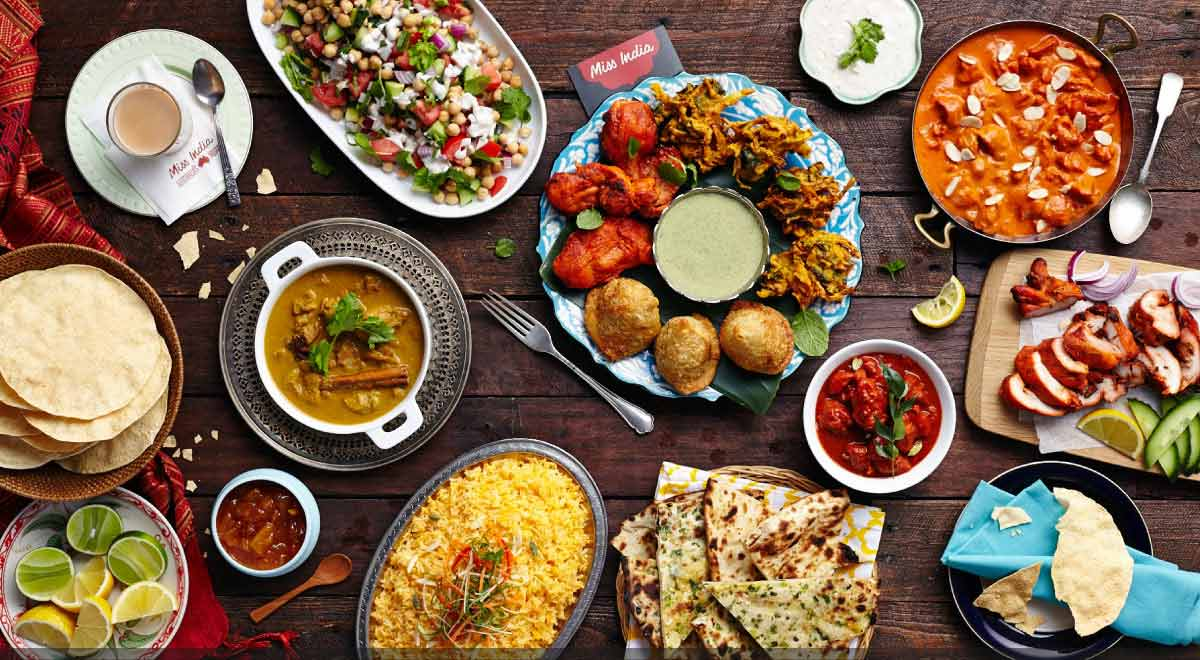

pic-credit = google-images

# Overview of Indian Food 101 Dataset

> name : name of the dish
> 
> ingredients : main ingredients used
> 
> diet : type of diet - either vegetarian or non vegetarian
> 
> prep_time : preparation time
> 
> cook_time : cooking time
> 
> flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc
> 
> course : course of meal - starter, main course, dessert, etc
> 
> state : state where the dish is famous or is originated
> 
> region : region where the state belongs
> 
> Presence of -1 in any of the columns indicates NaN value

# What We will Cover

>Nan Value Handling

>Unique Value Analysis

>Plotting Map of Indian State

>States which have high order of sweet consumption

>Ingredients which are moslty used in sweets 

>More about Veg-Cuisine 

>Overall Ingredientsused in Cuisine

**Indian Cuisine Fun Fact**

In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
from wordcloud import WordCloud,STOPWORDS
from collections import Counter


import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("../input/indian-food-101/indian_food.csv")

**Checking-out dataset**

In [ ]:
data.head(10)

In [ ]:
data.tail(10)

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.describe(include= 'object')

# Nan Value Conversion
**Converting -1 to np.nan Values**

In [ ]:
for x in data.columns:
    data[x] = data[x].apply(lambda x: np.nan if(x=='-1' or x==-1)else x)

**Checking Total Numbers of NaN Values and Percentage**

In [ ]:
for x in data.columns:
    print('Null Value in {0} = {1} \npercent = {2:.2f}%\n'.format(x,data[x].isna().sum(),data[x].isna().sum()/len(data)))

In [ ]:
# we can chose not to drop the nan values 
# there are lot of method avaliable to fill the nan value 
# but we can't use that because fill region and state require the proper research and documentation

# Unique Value Analysis

Let's total check number of unique values in specific Columns

In [ ]:
for x in data.columns:
    print('Unique Values in  {0} = {1}'.format(x,data[x].nunique()))

Diet have 2 unique value

In [ ]:
data['diet'].value_counts()

In [ ]:
fig = px.histogram(data,x='diet',color='diet',title='Unique Values in Diet Column')

fig.show()

Flavor Profile have 4 Unique Value

In [ ]:
data['flavor_profile'].value_counts()

In [ ]:
fig = px.histogram(data.dropna(),x='flavor_profile',color= 'flavor_profile',title = "Unique Values in flavor_profile Column")

fig.show()

Course have 4 Unique Value

In [ ]:
data['course'].value_counts()

In [ ]:
fig = px.histogram(data,x='course',color='course',title = 'Unique Value in Course Column')

fig.show()

# Plotting Map of India

> Let's see which State High Number of Cuisine

In [ ]:
sweets = data['state'].value_counts()
sweets.values


In [ ]:
sweets = data['state'].value_counts()
fig = px.choropleth(
    sweets,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations=sweets.index,
    color=sweets.index,
    color_continuous_scale='Reds',
    height = 700,
    hover_name = sweets.values,
    title = 'States and Total Numbers of Cuisine'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

> Checking Which Region high Number of Cuisine

In [ ]:
fig = px.histogram(data.dropna(),x='region',color = 'region',title = 'Region Contribution in Indian Cuisine')
fig.show()

# States which have high order of sweet consumption

In [ ]:
sweet_state = data[data['flavor_profile'] == 'sweet']
sweets = sweet_state['state'].value_counts()
fig = px.choropleth(
    sweets,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations=sweets.index,
    color=sweets.index,
    color_continuous_scale='Reds',
    height = 700,
    hover_name = sweets.values,
    title = 'States and Total Numbers of Sweets'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

# Ingredients which are moslty used in sweets 

In [ ]:
stopwords = set(STOPWORDS) 
def WordCloudSW(values):
    wordcloud = WordCloud(width = 500, height = 300, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(values) 
    
    plt.figure(figsize=(19,9))

    plt.axis('off')
    plt.title("Ingredients")
    plt.imshow(wordcloud)
    plt.show()


ing = ''
for x in list(sweet_state['ingredients']):
    ing+=''.join(x.split(','))
WordCloudSW(ing)


# More about Veg-Cuisine 

In [ ]:
veg = data[data['diet']=='vegetarian']

#lets see Which state have high number of Veg Cuisine
sweets = veg['state'].value_counts()
fig = px.choropleth(
    sweets,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations=sweets.index,
    color=sweets.index,
    color_continuous_scale='Reds',
    height = 700,
    hover_name = sweets.values,
    title = 'States and Total Numbers of Veg Cuisine'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

Lets see what are mostly Flovar of Veg Cuisine

In [ ]:
fig = px.histogram(veg.dropna(),x='flavor_profile',color= 'flavor_profile',title='Vegetarian Cuisine Flavor Profile')

fig.show()

> Lets check prepration time distribution

In [ ]:
fig = px.histogram(data , x='prep_time',title = 'Total Estimated  Time for Cuisine Preperation')

fig.show()

>Lets check Cooking time Distribution

In [ ]:
fig = px.histogram(data , x='cook_time',title = 'Estimated Cooking Time for Cuisine')

fig.show()

# Overall Ingredientsused in Cuisine

In [ ]:
ing = ''
for x in list(data['ingredients']):
    ing+=''.join(x.split(','))
WordCloudSW(ing)

**If you guys have any Question/s or tip please comment, it will help me to improve**

**Thank You**

# Indian Cuisine Fun Fact

>Greek, Roman and Arab traders have contributed a lot to the first foreign flavours in Indian cuisine.

>Portuguese introduced us to refined sugar. Before that? Fruits and honey were used as sweeteners in Indian food.

>The first Indian restaurant in the USA was opened in the mid 1960s. Today, there are around 80,000 Indian restaurants in America.

>According to Indian Food Theory, our food has 6 different flavours: sweet, salty, bitter, sour, astringent and spicy.